In [1]:
# !pip install pandas_datareader

In [2]:
import pandas_datareader as pdr

In [3]:
# key ='8f3fe973f343e88abb3bf0410ad0a10030596f19'

In [4]:
# df = pdr.get_data_tiingo('AAPL', api_key=key)

In [5]:
# df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-10-13 00:00:00+00:00,156.99,157.28,156.41,156.73,16287608,37.246402,37.315206,37.108795,37.184716,65150432,0.0,1.0
1,AAPL,2017-10-16 00:00:00+00:00,159.88,160.00,157.65,157.90,23894630,37.932064,37.960535,37.402990,37.462303,95578520,0.0,1.0
2,AAPL,2017-10-17 00:00:00+00:00,160.47,160.87,159.23,159.78,18816438,38.072044,38.166945,37.777850,37.908339,75265752,0.0,1.0
3,AAPL,2017-10-18 00:00:00+00:00,159.76,160.71,159.60,160.42,16158659,37.903594,38.128985,37.865634,38.060181,64634636,0.0,1.0
4,AAPL,2017-10-19 00:00:00+00:00,155.98,157.08,155.02,156.75,42111326,37.006776,37.267755,36.779013,37.189462,168445304,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-10-05 00:00:00+00:00,146.40,147.38,143.0100,144.075,79470968,146.40,147.38,143.0100,144.075,79470968,0.0,1.0
1253,AAPL,2022-10-06 00:00:00+00:00,145.43,147.54,145.2200,145.810,68402169,145.43,147.54,145.2200,145.810,68402169,0.0,1.0
1254,AAPL,2022-10-07 00:00:00+00:00,140.09,143.10,139.4450,142.540,85925559,140.09,143.10,139.4450,142.540,85925559,0.0,1.0
1255,AAPL,2022-10-10 00:00:00+00:00,140.42,141.89,138.5729,140.420,74899002,140.42,141.89,138.5729,140.420,74899002,0.0,1.0
1256,AAPL,2022-10-11 00:00:00+00:00,138.98,141.35,138.2200,139.900,77033672,138.98,141.35,138.2200,139.900,77033672,0.0,1.0


In [10]:
df.shape

(1257, 14)

In [11]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000
mean,191.895863,193.905754,189.643705,191.669553,6.023340e+07,92.483305,93.511715,91.367046,92.411207,1.177465e+08,0.008473,1.002387
std,68.500185,69.148018,67.497683,68.211501,4.096141e+07,47.019849,47.599644,46.402518,47.003834,5.472853e+07,0.074307,0.084616
min,106.840000,110.190000,103.100000,104.540000,1.136204e+07,34.364620,35.217754,34.318700,34.797229,4.099995e+07,0.000000,1.000000
25%,148.260000,149.430000,146.470000,148.150000,2.776067e+07,46.963823,47.652491,46.465148,46.861944,8.137873e+07,0.000000,1.000000
50%,172.970000,174.500000,171.461000,172.780000,4.780059e+07,77.209066,78.111029,76.513755,77.216463,1.035588e+08,0.000000,1.000000
75%,209.680000,212.050000,207.700000,209.880000,8.444274e+07,137.398880,140.474601,135.441602,137.199158,1.375225e+08,0.000000,1.000000
max,506.090000,515.140000,500.330000,514.790000,3.326072e+08,181.260451,182.186621,178.382353,181.877898,4.268849e+08,0.820000,4.000000


# Data cleaning

In [12]:
df1 = df.reset_index()['close']

In [13]:
df1.shape

(1257,)

In [14]:
import matplotlib.pyplot as plt

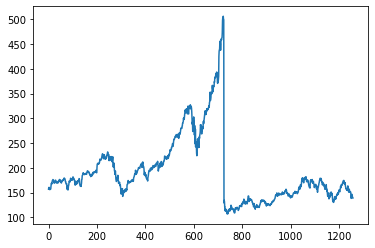

In [15]:
plt.plot(df1)

In [16]:
# LSTM is sensitive to data - need to transform it

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
df1.shape

(1257, 1)

In [20]:
df1

array([[0.12561052],
       [0.13284909],
       [0.13432686],
       ...,
       [0.08328115],
       [0.0841077 ],
       [0.08050094]])

# Spliting a data based on date

In [21]:
# split in train and test
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size

In [22]:
training_size, test_size

(817, 440)

In [23]:
train_data, test_data = df1[0: training_size, :], df1[training_size:len(df1), :]

In [24]:
train_data.shape, test_data.shape

((817, 1), (440, 1))

In [25]:
# create dataset

In [26]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0] #i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
time_step=150
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [28]:
print(X_train)

[[0.12561052 0.13284909 0.13432686 ... 0.203732   0.20075141 0.19904822]
 [0.13284909 0.13432686 0.13254853 ... 0.20075141 0.19904822 0.20235441]
 [0.13432686 0.13254853 0.12308078 ... 0.19904822 0.20235441 0.20117721]
 ...
 [0.53971196 0.56270507 0.56761428 ... 0.056531   0.06053851 0.0494928 ]
 [0.56270507 0.56761428 0.59398873 ... 0.06053851 0.0494928  0.06031309]
 [0.56761428 0.59398873 0.61615529 ... 0.0494928  0.06031309 0.06314339]]


In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((666, 150), (666,), (289, 150), (289,))

In [30]:
716+339

1055

In [31]:
# reshape input to be [samples, time steps, features] which is req for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [32]:
X_train.shape, X_test.shape

((666, 150, 1), (289, 150, 1))

# Create stacked LSTM model 

In [33]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=100, verbose=1)

Epoch 1/100
11/11 [==============================] - 15s 734ms/step - loss: 0.0734 - val_loss: 0.0031
Epoch 2/100
11/11 [==============================] - 5s 432ms/step - loss: 0.0165 - val_loss: 0.0059
Epoch 3/100
11/11 [==============================] - 4s 331ms/step - loss: 0.0140 - val_loss: 0.0010
Epoch 4/100
11/11 [==============================] - 4s 365ms/step - loss: 0.0090 - val_loss: 3.5895e-04
Epoch 5/100
11/11 [==============================] - 4s 316ms/step - loss: 0.0115 - val_loss: 0.0031
Epoch 6/100
11/11 [==============================] - 3s 241ms/step - loss: 0.0071 - val_loss: 3.8372e-04
Epoch 7/100
11/11 [==============================] - 2s 228ms/step - loss: 0.0080 - val_loss: 4.2185e-04
Epoch 8/100
11/11 [==============================] - 3s 240ms/step - loss: 0.0072 - val_loss: 5.0241e-04
Epoch 9/100
11/11 [==============================] - 4s 334ms/step - loss: 0.0092 - val_loss: 0.0014
Epoch 10/100
11/11 [==============================] - 3s 291ms/step - loss

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [ ]:
# transform back to original form
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_train, train_pred))

In [ ]:
# test data RMSE
math.sqrt(mean_squared_error(y_test, test_pred))

# Plot the result

In [ ]:
# shift train prediction
look_back = time_step
train_pred_plot = np.empty_like(df1)
train_pred_plot[:,:] = np.nan
train_pred_plot[look_back: len(train_pred) + look_back, :] = train_pred

# shift test pred
test_pred_plot = np.empty_like(df1)
test_pred_plot[:,:] = np.nan
test_pred_plot[len(train_pred) + (look_back*2)+1:len(df1)-1, :] = test_pred

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_pred_plot)
plt.plot(test_pred_plot)
plt.rcParams["figure.figsize"] = (15,15)
# plt.show()

# Future 30 days prediction

In [ ]:
len(test_data) - time_step

In [ ]:
x_input = test_data[len(test_data) - time_step:].reshape(1,-1)

In [ ]:
x_input.shape

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
temp_input[:10]

In [ ]:
lst_output=[]
n_steps = time_step

In [ ]:
i=0
days = 100
while(i < days):
    
    if(len(temp_input)> n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new = np.arange(1,time_step+1)
day_pred = np.arange(time_step+1, time_step+days)

In [ ]:
day_new.shape

In [ ]:
day_pred.shape

In [ ]:
len(df1)

In [ ]:
# plot the graph
plt.plot(day_new,scaler.inverse_transform(df1[len(df1):]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:

df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)
